## Implement both SK Learn and OLS implementation

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('height_weight.csv')
df.head()

,Weights,Heights
0,105,201.5
1,88,182.0
2,75,187.5
3,33,158.5
4,51,159.5


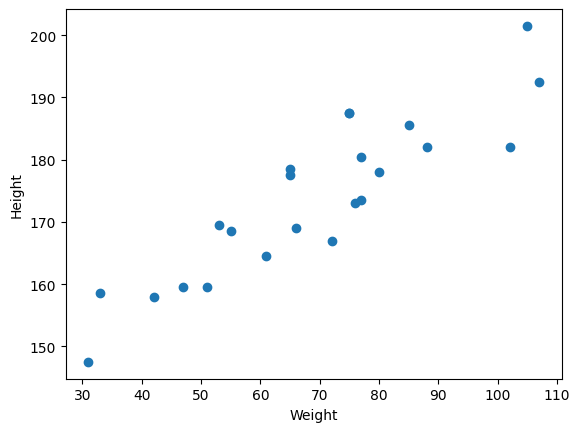

In [8]:
# scatter plots
plt.scatter(x=df['Weights'], y=df['Heights'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [9]:
# Find correlation
df.corr()

,Weights,Heights
Weights,1.000000,0.893424
Heights,0.893424,1.000000


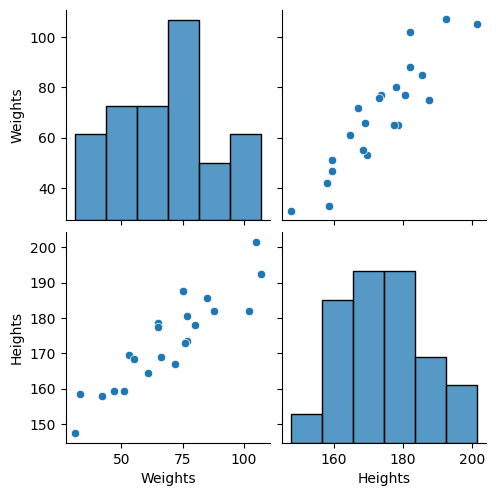

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
# Dependent and In-dependent feature
X = df[['Weights']] # Always make sure that your independent feature should be a dataframe -> 2D array
y = df['Heights'] # Dependent feature can be a series or 1D array

In [12]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train

,Weights
1,88
13,72
5,31
2,75
11,66
20,47
3,33
4,51
18,76
16,77


#### Standardization
It is required to be performed on the independent variable because they may have bigger values. By doing this process, we convert the distribution of the independent variable to u=0 and sigma=1 (which is a standard normal distribution).
This process is performed using the Zscore

In [14]:
# Standardization of the input features
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[ 1.52383118],
       [ 0.52266673],
       [-2.04281716],
       [ 0.71038507],
       [ 0.14723007],
       [-1.04165271],
       [-1.9176716 ],
       [-0.7913616 ],
       [ 0.77295784],
       [ 0.83553062],
       [-0.54107049],
       [ 0.83553062],
       [-0.16563382],
       [ 1.02324895],
       [ 0.08465729],
       [-0.66621605],
       [ 0.71038507]])

In [17]:
# Apply simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [18]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
print(f"Coeff: {regression.coef_}")

Coeff: [9.03472966]


In [20]:
print(f"Intercept: {regression.intercept_}")

Intercept: 170.76470588235293


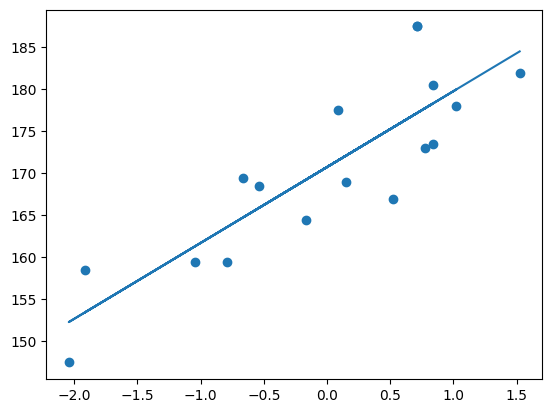

In [21]:
# For training data, plot best-fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [22]:
# Prediction for the test data
y_predict = regression.predict(X_test)

In [23]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

37.81934516623513
5.123114579381858
6.1497435041012185


In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test, y_predict)
print(score)

0.7908607640576859


In [27]:
# Adjusted R square score
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7385759550721074

In [28]:
regression.predict(scaler.transform([[32]]))

/Users/bijonlahiri/Desktop/udemy_machine_learning_course/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([152.87373327])